In [1]:
import sys
sys.path.insert(0, '../../modules')
%pylab inline
%run ../visualizations.ipynb
%run ../data_tools.ipynb
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [2]:
from tracking import HoughSpace
from scipy import sparse
import scipy
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.ticker as mtick
from hits import CyDetHits, CTHHits, CDCHits

In [3]:
file_base = "/home/elg112/development/ICEDUST/track_finding_standalone/"\
            "track_finding_yandex/data/"
signal_files  = ["oa_xx_xxx_09100000-0000_opgjz6dop7ho_user-TrkTree_000_signal-label.root",
                 "oa_xx_xxx_09200000-0000_bxszqgjrri2n_user-TrkTree_000_signal-label.root",
                 "oa_xx_xxx_09400000-0000_7i52rtj3sz5v_user-TrkTree_000_signal-label.root",
                 "oa_xx_xxx_09600000-0000_xjij4zcypjul_user-TrkTree_000_signal-label.root",
                 "oa_xx_xxx_09800000-0000_b72ef5hzppor_user-TrkTree_000_signal-label.root",
                 "oa_xx_xxx_09900000-0000_orbwudhvihxn_user-TrkTree_000_signal-label.root"]

signal_files = ["oa_xx_xxx_09000000-0000_pdevedxn64ot_user-TrkTree_000_500signal-label.root",
                "oa_xx_xxx_09100000-0000_skzt2l7sdqvx_user-TrkTree_000_500signal-label.root",
                "oa_xx_xxx_09200000-0000_x67rltrbhc3n_user-TrkTree_000_500signal-label.root",
                "oa_xx_xxx_09300000-0000_seae7w5z6fvt_user-TrkTree_000_500signal-label.root",
                "oa_xx_xxx_09400000-0000_o774i4trtmim_user-TrkTree_000_500signal-label.root",
                "oa_xx_xxx_09500000-0000_ufkycd74hb4i_user-TrkTree_000_500signal-label.root",
                "oa_xx_xxx_09600000-0000_arxgz3idch3j_user-TrkTree_000_500signal-label.root",
                "oa_xx_xxx_09700000-0000_5xz67bjkzokx_user-TrkTree_000_500signal-label.root",
                "oa_xx_xxx_09800000-0000_jrdukg5g2ivh_user-TrkTree_000_500signal-label.root",
                "oa_xx_xxx_09900000-0000_kgij2afd5rtp_user-TrkTree_000_500signal-label.root"]

signal_files = ["oa_xx_xxx_09000000-0000_qs4c2zivfkyl_user-TrkTree_000_700signal-label.root",
                "oa_xx_xxx_09100000-0000_k6i42km533k7_user-TrkTree_000_700signal-label.root",
                "oa_xx_xxx_09200000-0000_uuu3dtsod77t_user-TrkTree_000_700signal-label.root",
                "oa_xx_xxx_09300000-0000_2s4hlrntpcyh_user-TrkTree_000_700signal-label.root",
                "oa_xx_xxx_09400000-0000_vrw7y5jhefms_user-TrkTree_000_700signal-label.root",
                "oa_xx_xxx_09500000-0000_2xxlflqodbqq_user-TrkTree_000_700signal-label.root",
                "oa_xx_xxx_09600000-0000_ak6psvrdnn4v_user-TrkTree_000_700signal-label.root",
                "oa_xx_xxx_09700000-0000_bipfrfikeaqy_user-TrkTree_000_700signal-label.root",
                "oa_xx_xxx_09800000-0000_5w5tj34s5elw_user-TrkTree_000_700signal-label.root",
                "oa_xx_xxx_09900000-0000_diro4pagpbtt_user-TrkTree_000_700signal-label.root"]


back_files = ["batch_2_TrkTree_2500.root",
              "batch_3_TrkTree_2536.root",
              "batch_4_TrkTree_5250.root"]

signal_files = [ file_base + file_name for file_name in signal_files]
back_files   = [ file_base + file_name for file_name in back_files]
these_branches = {}
these_branches["CDC"] = ["MCPos.fP.fX", "MCPos.fP.fY", "MCPos.fP.fZ"]
these_branches["CTH"] = ["MCPos.fP.fX", "MCPos.fP.fY", "MCPos.fP.fZ"]

In [4]:
ran_yet = False
hits = data_import_sample(signal_files[0], "/home/elg112/development/ICEDUST/track_finding_standalone/track_finding_yandex/data/sample_tree.root", 
                          these_cuts=["Trig","Track","700"],
                          branches=these_branches)
hits.cth.set_trigger_time()
data_remove_coincidence(hits)

Using cuts
{ 'CDC': '1 == 1 && 1 == 1 && CDCHit.fDetectedTime < 1620 && '
         'CDCHit.fDetectedTime > 700',
  'CTH': '1 == 1 && 1 == 1 && CTHHit.fMCPos.fE < 1620 && CTHHit.fMCPos.fE > '
         '700'}
Getting branches
{'CDC': ['MCPos.fP.fX', 'MCPos.fP.fY', 'MCPos.fP.fZ'],
 'CTH': ['MCPos.fP.fX', 'MCPos.fP.fY', 'MCPos.fP.fZ']}


TClass::Init:0: RuntimeWarning: no dictionary for class COMET::ICOMETEvent is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::IDataVector is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::IData is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::IDatum is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::ICOMETContext is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::ISHAHashValue is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::IAlignmentId is available
TClass::Init:0: RuntimeWarning: no dictionary for class COMET::ICOMETEvent::Header is available


Using cuts
{ 'CDC': 'CDCHit.fGoodTrig == 1 && CDCHit.fGoodTrack == 1 && '
         'CDCHit.fDetectedTime < 1620 && CDCHit.fDetectedTime > 700',
  'CTH': 'CTHHit.fGoodTrig == 1 && CTHHit.fGoodTrack == 1 && '
         'CTHHit.fMCPos.fE < 1620 && CTHHit.fMCPos.fE > 700'}
Getting branches
{'CDC': ['MCPos.fP.fX', 'MCPos.fP.fY', 'MCPos.fP.fZ'],
 'CTH': ['MCPos.fP.fX', 'MCPos.fP.fY', 'MCPos.fP.fZ']}
Trimming Signal Events
CTH Sig Events 1 
CTH Back Events 1 
CDC Sig Events 1 
CDC Back Events 1 


In [5]:
if not ran_yet:
    vol_id_name = "CTHHit.fvol_id"
    x_pos_name = "CTHHit.fMCPos.fP.fZ"
    y_pos_name = "CTHHit.fMCPos.fP.fY"
    t_pos_name = "CTHHit.fMCPos.fE"
    hits.cth.data[x_pos_name] = - (hits.cth.data[x_pos_name]/10. - 765)
    hits.cth.data[y_pos_name] = hits.cth.data[y_pos_name]/10.

    cdc_vol_id_name = "CDCHit.fvol_id"
    cdc_z_pos_name = "CDCHit.fMCPos.fP.fX"
    cdc_x_pos_name = "CDCHit.fMCPos.fP.fZ"
    cdc_y_pos_name = "CDCHit.fMCPos.fP.fY"
    cdc_t_pos_name = "CDCHit.fMCPos.fE"
    hits.cdc.data[cdc_x_pos_name] = - (hits.cdc.data[cdc_x_pos_name]/10. - 765)
    hits.cdc.data[cdc_y_pos_name] = hits.cdc.data[cdc_y_pos_name]/10.
    hits.cdc.data[cdc_z_pos_name] = (hits.cdc.data[cdc_z_pos_name]/10. - 641)
    ran_yet = True

In [6]:
geom = hits.cdc.geom
cth_geom = hits.cth.geom

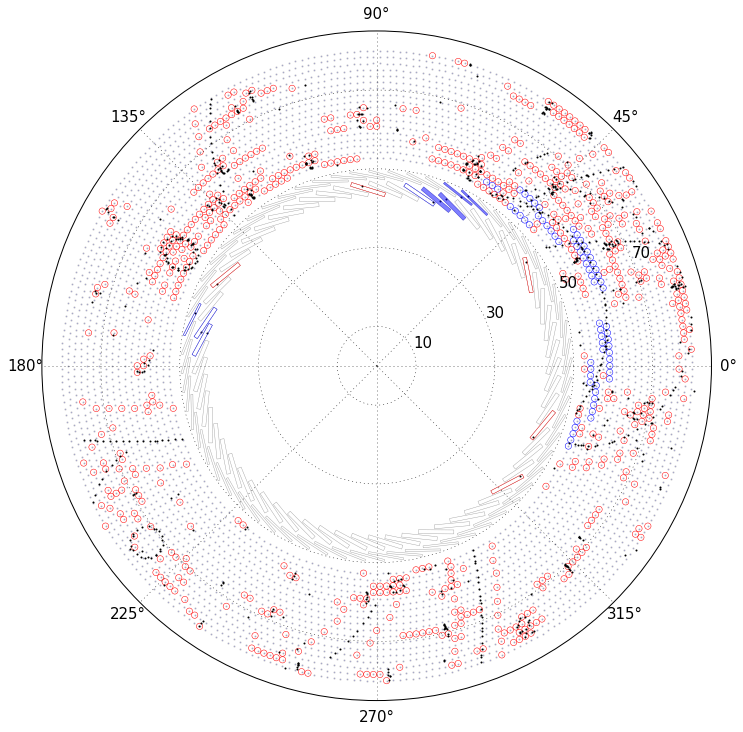

IndexError: index 1 is out of bounds for axis 0 with size 1

In [8]:
for evt in range(10):
    # Plot the output
    plot_output(np.zeros_like(hits.cdc.get_hit_types(evt)), geom)
    # Add hit outlines
    plot_add_outlines(hits.cdc.get_hit_types(evt), geom)
    # Add volume outlines
    plot_add_cth_outlines(cth_geom)
    # Add the CTH vols with hits
    cth_vol_types = hits.cth.get_vol_types(evt)
    plot_add_cth(cth_vol_types, hits.cth.get_trig_vector(evt)[0], cth_geom)
    cth_hits = hits.cth.get_events(evt)
    cdc_hits = hits.cdc.get_events(evt)
    plt.scatter(cth_hits[x_pos_name], cth_hits[y_pos_name], s=1, transform=gca().transData._b)
    plt.scatter(cdc_hits[cdc_x_pos_name], cdc_hits[cdc_y_pos_name], s=1, transform=gca().transData._b)
    plt.show()